In [6]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

Task Description:

Case 1: Binomial Tree
Consider the unit-linked contract with maturity guarantee that was discussed in the lecture.
Take the risk-free rate equal to r = 1%, the volatility sigma = 15% and
the guaranteed amount at T = 10 equal to 100 (i.e., we have a contract with a 0%
guarantee).

We want to use a binomial tree with increasing number of steps to compute the price of this
contract. In the lecture we used 4 time-steps, but this is not realistic. Make a computer
program where you increase the number of steps in the binomial tree from 4 to 100 and
make a graph of how the price of the contract as a function of the number of steps develops.

Questions:
• Can you explain the pattern that you see in the graph? Describe how you investigate
this question.
• When you keep the number of steps fixed (say 100), how does the price of the
contract change if you change r or sigma or T. Can you explain these changes?
• Can you modify your program to make it run faster (e.g., for a tree with 10 000
steps)? If so, what changes did you make compared to your initial code? Describe
how you have analysed the run-time of the code.


In [7]:
# create function to calculate the price of contract
def price_contract(r,sigma,T,guarantee, n, initial_price=100):
    dt = T/n
    R = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (R-d)/(u-d)

    # create matrix to store stock prices
    stock = np.zeros((n+1,n+1))
    stock[0,0] = initial_price
    for i in range(1,n+1):
        stock[i,0] = stock[i-1,0]*u
        for j in range(1,i+1):
            stock[i,j] = stock[i-1,j-1]*d

    # create matrix to store option prices
    option = np.zeros((n+1,n+1))
    option[n,:] = np.maximum(guarantee-stock[n,:],0)

    # calculate option prices at each node
    for i in range(n-1,-1,-1):
        for j in range(i+1):
            option[i,j] = np.exp(-r*dt)*(p*option[i+1,j]+(1-p)*option[i+1,j+1])

    return option[0,0]


In [8]:
# create a method to plot the price of the contract as a function of the number of steps
def plot_price(r,sigma,T,guarantee,n):
    steps = np.arange(1,n+1)
    price = np.zeros(len(steps))
    for i in range(len(steps)):
        price[i] = price_contract(r,sigma,T,guarantee,steps[i],n)
    plt.plot(steps,price)
    plt.xlabel('Number of steps')
    plt.ylabel('Price of contract')
    plt.title("r={}, sigma={}, T={}, guarantee={}".format(r,sigma,T,guarantee))
    plt.show()

Price of contract: 7.3601489924888215


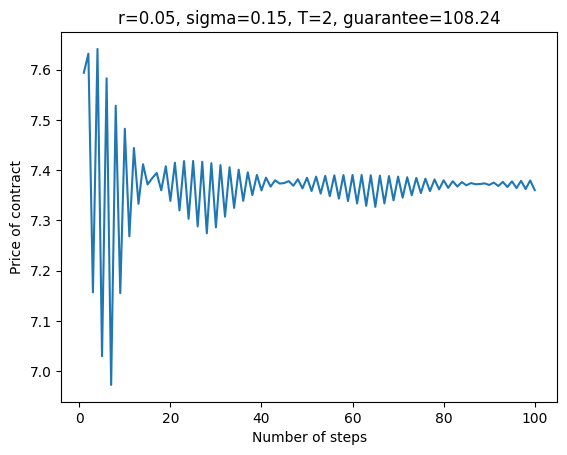

In [9]:
# initialize variables as from the slides as santiy check
r = 0.05
sigma = 0.15
T = 2
guarantee = 108.24
n = 100 # number of steps

# plot price
print("Price of contract: {}".format(price_contract(r,sigma,T,guarantee,n)))
plot_price(r,sigma,T,guarantee, n=100)

Price of contract: 13.43953782342894


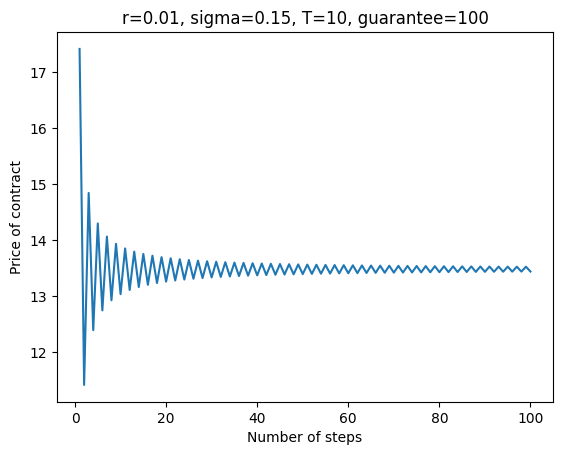

In [10]:
# Task parameters
r = 0.01
sigma = 0.15
T = 10
guarantee = 100
n = 100 # number of steps
# plot price
print("Price of contract: {}".format(price_contract(r,sigma,T,guarantee,n)))
plot_price(r,sigma,T,guarantee, n=100)

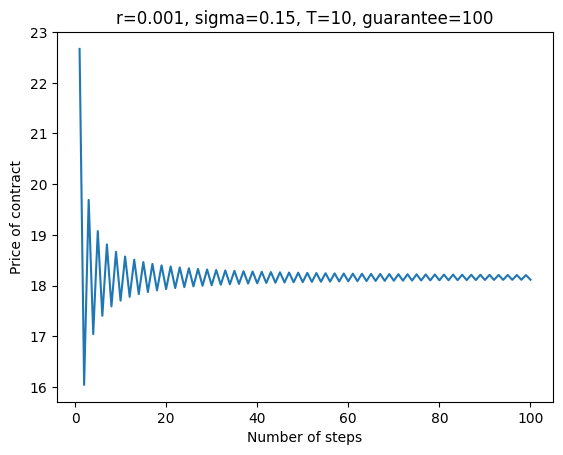

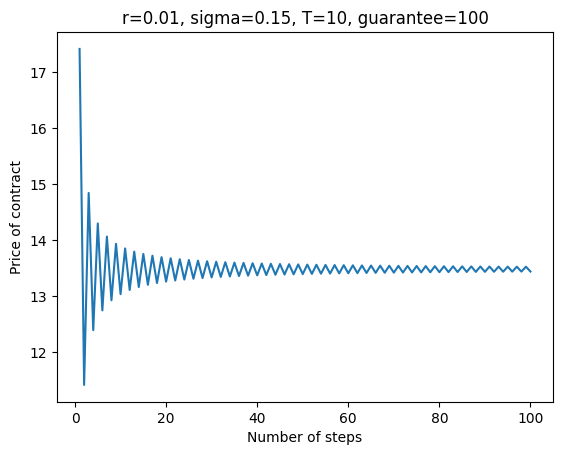

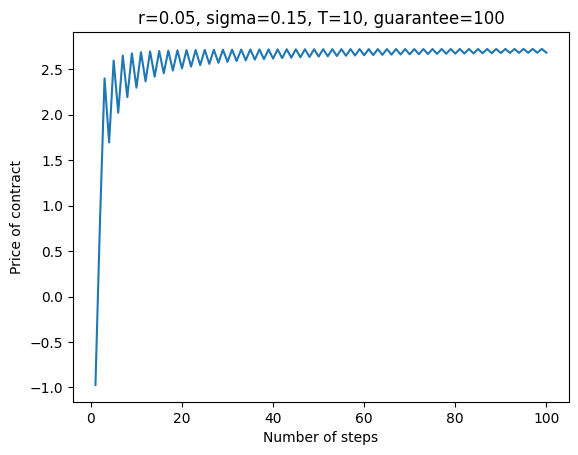

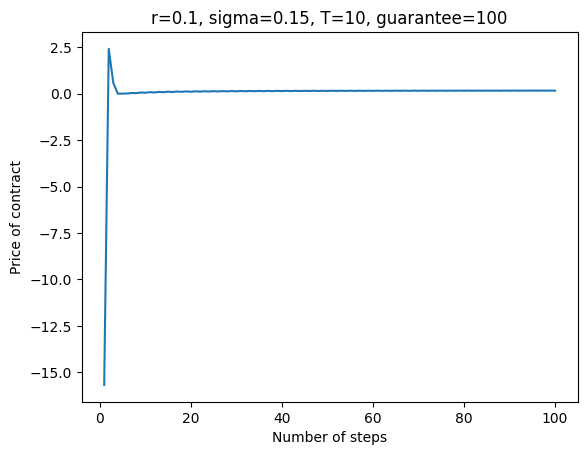

In [11]:
# plot for different r
r_range = np.array([0.001, 0.01, 0.05, 0.1])
for r in r_range:
    plot_price(r,sigma,T,guarantee, n=100)

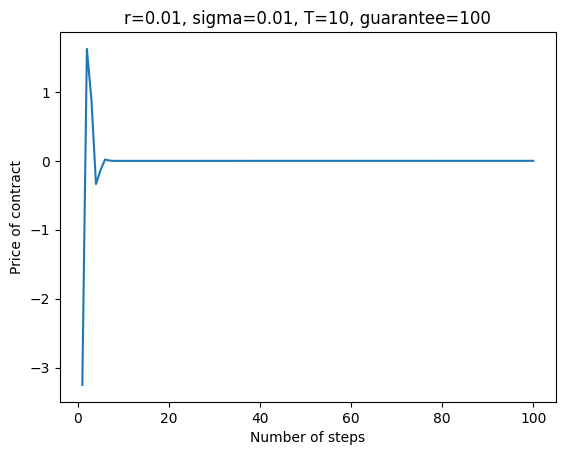

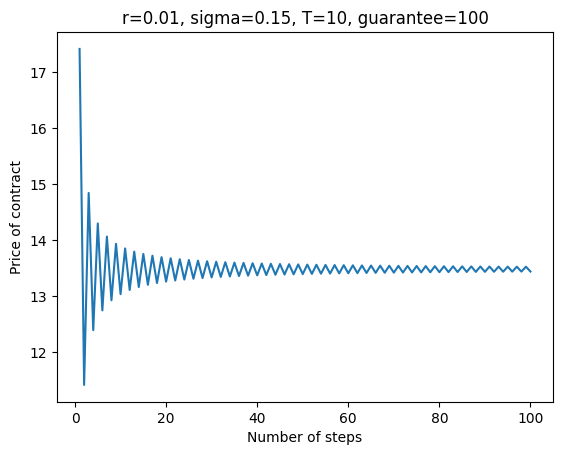

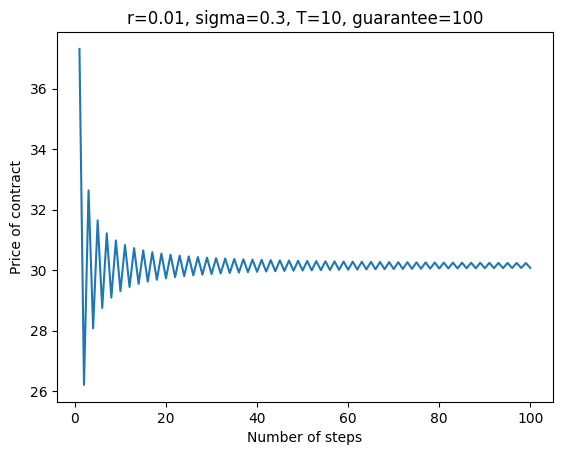

In [12]:
sigma_range = np.array([0.01, 0.15, 0.3])
for sigma in sigma_range:
    plot_price(r=0.01,sigma=sigma,T=10,guarantee=100, n=100)

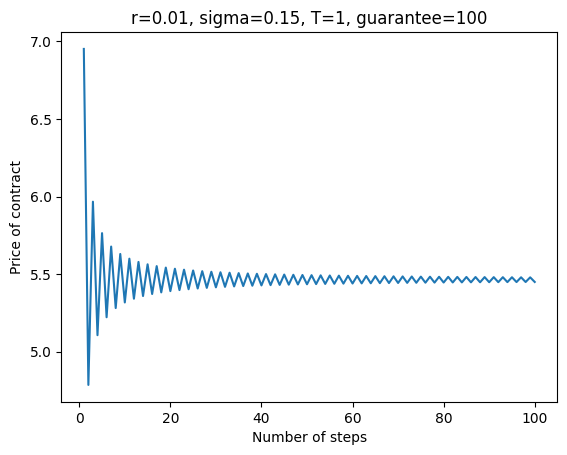

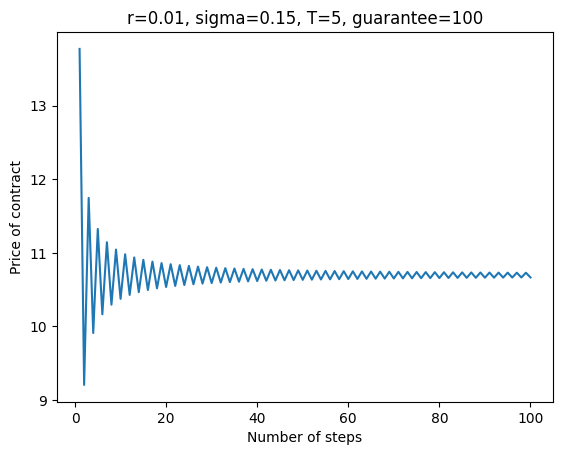

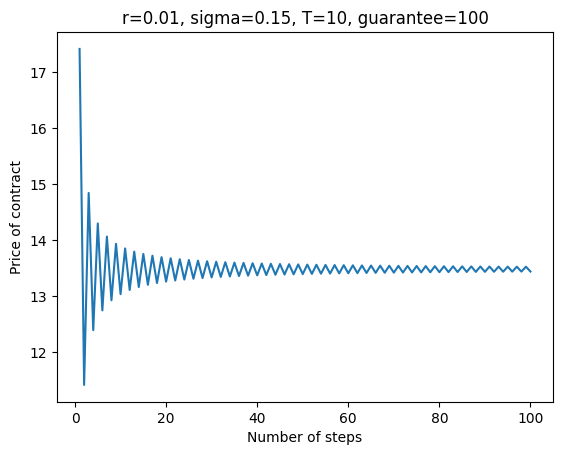

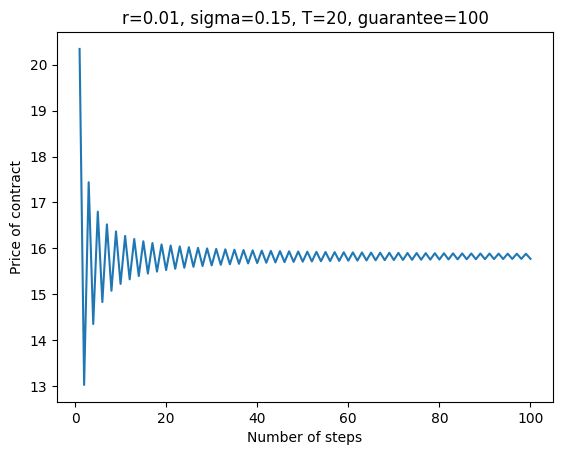

In [13]:
T_range = np.array([1, 5, 10, 20])
for T in T_range:
    plot_price(r=0.01,sigma=0.15,T=T,guarantee=100, n=100)

In [14]:
# obviously price contract can be vectorized using numpy to make it faster
# so I will do that

def price_contract_vectorized(r,sigma,T,guarantee, n, initial_price=100):
    dt = T/n
    R = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (R-d)/(u-d)

    # init asset prices at maturity
    stock = initial_price * u ** np.arange(0,n+1,1) * d ** np.arange(n,-1,-1)

    # init option prices at maturity
    stock = np.maximum(guarantee-stock, np.zeros(n+1))

    # calculate option prices at each node
    for i in np.arange(n,0,-1):
        stock = np.exp(-r*dt) * (p * stock[1:i+1] + (1-p) * stock[0:i])

    return stock[0]


In [15]:
%timeit for i in range(100): price_contract(r=0.01,sigma=0.15,T=10,guarantee=100, n=100)

841 ms ± 9.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%timeit for i in range(10): price_contract(r=0.01,sigma=0.15,T=10,guarantee=100, n=1000)

8.89 s ± 535 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%timeit for i in range(100): price_contract_vectorized(r=0.01,sigma=0.15,T=10,guarantee=100, n=100)

48.9 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%timeit for i in range(10): price_contract_vectorized(r=0.01,sigma=0.15,T=10,guarantee=100, n=1000)

60.2 ms ± 2.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
# create a method to plot the price of the contract as a function of the number of steps
def plot_price_v(r,sigma,T,guarantee,n):
    steps = np.arange(1,n+1)
    price = np.zeros(len(steps))
    for i in range(len(steps)):
        price[i] = price_contract_vectorized(r,sigma,T,guarantee,steps[i],n)
    plt.plot(steps,price)
    plt.xlabel('Number of steps')
    plt.ylabel('Price of contract')
    plt.title("r={}, sigma={}, T={}, guarantee={}".format(r,sigma,T,guarantee))
    plt.show()

Price of Contract: 7.360148992488811


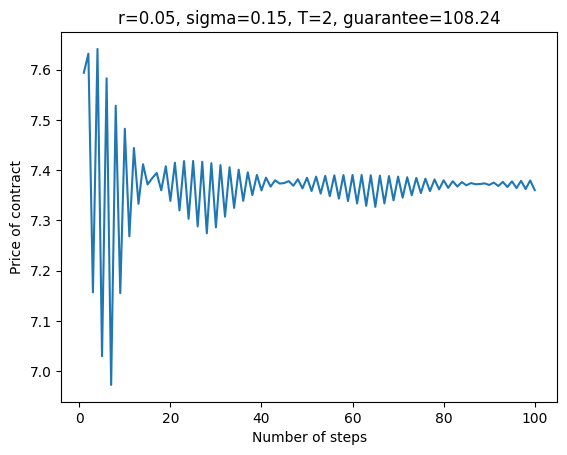

In [20]:
print("Price of Contract: {}".format(price_contract_vectorized(r=0.05,sigma=0.15,T=2,guarantee=108.24, n=100)))
plot_price_v(r=0.05,sigma=0.15,T=2,guarantee=108.24, n=100)

Price of Contract: 13.439537823428958


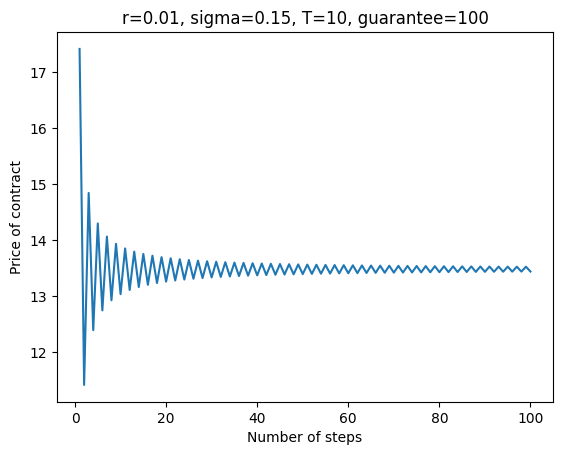

In [21]:
print("Price of Contract: {}".format(price_contract_vectorized(r=0.01,sigma=0.15,T=10,guarantee=100, n=100)))
plot_price_v(r=0.01,sigma=0.15,T=10,guarantee=100, n=100)